In [1]:
from new_thesis_library import *
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

%matplotlib inline

# Moex thetas

In [2]:
moex_thetas = pd.read_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/moex_dynamic.csv',
                          sep = ';')

moex_thetas['tradedate'] = pd.to_datetime(moex_thetas['tradedate'], format='%d.%m.%Y')
moex_thetas[['B1', 'B2', 'B3', 'T1']] = moex_thetas[['B1', 'B2', 'B3', 'T1']].apply(lambda x: x.str.replace(',','.'))
moex_thetas[['B1', 'B2', 'B3', 'T1']] = moex_thetas[['B1', 'B2', 'B3', 'T1']].astype('float64')
moex_thetas[['B1', 'B2', 'B3']] = moex_thetas[['B1', 'B2', 'B3']]/10000
moex_thetas = moex_thetas[['tradedate', 'T1', 'B1', 'B2', 'B3']]
moex_thetas.set_index('tradedate', inplace = True)

/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/new_thesis_library.py:41: RuntimeWarning: invalid value encountered in true_divide
  return beta0 + beta1 * (1 - np.exp(- m / tau)) / (m / tau) + beta2 * ((1 - np.exp(- m / tau)) / (m / tau) - np.exp(- m / tau))


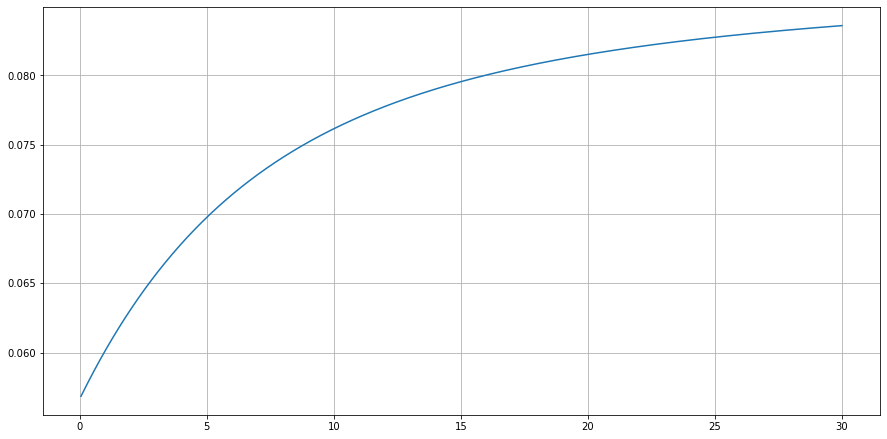

In [3]:
m = np.linspace(0, 30, 600)
plt.figure(figsize = (15,7.5))
plt.grid()
plt.plot(m, ns(m, moex_thetas[0:1].values[0]), label = 'NS curve');

In [9]:
moex_thetas_stats = moex_thetas.describe()
moex_thetas_stats

,T1,B1,B2,B3
count,1643.000000,1643.000000,1643.000000,1643.000000
mean,4.871800,0.087704,-0.011902,0.003621
std,4.515339,0.015014,0.023744,0.038101
min,0.300073,0.055520,-0.063911,-0.073377
25%,1.538723,0.079948,-0.025936,-0.020286
50%,3.381781,0.085636,-0.014949,0.001554
75%,6.234200,0.092933,0.000730,0.022876
max,17.525151,0.130801,0.056864,0.119194


In [15]:
moex_thetas_stats['B1']['min']

0.055519527000000006

# Generating random values

We will be generating random values in the borders of max/min +- 3 std for betas, [0, 30] for tau.

In [25]:
np.random.seed(1)

for i in range(16):
    random_thetas = np.zeros([len(dates), 5])
    for j in range(len(dates)):
        random_thetas[j] = np.array([int(i + 1), 
                                     np.random.uniform(0, 30), 
                                     np.random.uniform(moex_thetas_stats['B1']['min'] - 3 * moex_thetas_stats['B1']['std'], moex_thetas_stats['B1']['max'] + 3 * moex_thetas_stats['B1']['std']), 
                                     np.random.uniform(moex_thetas_stats['B2']['min'] - 3 * moex_thetas_stats['B2']['std'], moex_thetas_stats['B2']['max'] + 3 * moex_thetas_stats['B2']['std']), 
                                     np.random.uniform(moex_thetas_stats['B3']['min'] - 3 * moex_thetas_stats['B3']['std'], moex_thetas_stats['B3']['max'] + 3 * moex_thetas_stats['B3']['std'])])
    random_thetas = pd.DataFrame(random_thetas, columns = ['Value', 'tau', 'beta0', 'beta1', 'beta2'], index = dates)
    random_thetas.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Data/New_data/Random_thetas/rand_' + str(i + 1) + '.csv')